In [1]:
# 📌 01_data_exploration.ipynb
# Purpose: Load & explore Excel files from the raw data

# --- 1. Import libraries ---
import pandas as pd
import numpy as np


In [2]:
# Optional: widen notebook view
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [3]:
# --- 2. Define file paths ---
hp_data_path = '../data/raw/Hp_data.xlsx'
email_data_path = '../data/raw/Digital_duo.xlsx'

In [4]:
# --- 3. Load Excel sheets ---
# For HP Data file
hp_xls = pd.ExcelFile(hp_data_path)
print("HP Data Sheets:", hp_xls.sheet_names)

HP Data Sheets: ['TOPSHEET', 'Media Spend by Channel', 'Cust By Channel-New', 'Cust By Channel-Ext', 'Orders By Channel-New', 'Orders By Channel-Ext']


In [5]:
# For Email Data file
email_xls = pd.ExcelFile(email_data_path)
print("Email Data Sheets:", email_xls.sheet_names)

Email Data Sheets: ['Media Spend', 'Email', 'Returns', 'Web Analytics', 'Marketing Channel Breakdown', 'Web analytics - 2', 'Technology Spend']


In [6]:
# --- 4. Load the actual dataframes (update sheet names if needed) ---
# HP Data
hp_df = hp_xls.parse(hp_xls.sheet_names[0])  # Replace with actual name if known
print("HP Data Preview:")
display(hp_df.head())

HP Data Preview:


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DATA SOURCE,DATA SOURCE,KPI,YEAR,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
2,NaN,Datahub\n(Shopify),GROSS-DISC\nMissing 4 months of 21 because of ...,2025,1079835.87,876298.03,1159321.11,1214502.58,1618042.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5947999.6
3,SHOPIFY,NaN,NaN,2024,957701.42,954880.12,975023.84,1090895.52,1516157.7,1011701.99,948311.9,1128109.82,958710.51,985807.41,1764492.45,2345488.27,14637280.95
4,https://admin.shopify.com/store/hanky-panky-dt...,NaN,NaN,2023,968195,784298,1118958,892836,1702721,864458,1036750,991799,1182469,917970,2544000,1595092,14599546


In [7]:
# Email Data
email_df = email_xls.parse(email_xls.sheet_names[0])  # Replace with actual name if known
print("Email Data Preview:")
display(email_df.head())

Email Data Preview:


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,Year,Month,Channel,Partner,Media Spend,Agency Spend,NaN,Year,Month,Channel,Partner,Media Spend,Agency Spend
1,NaN,NaN,2024,Jan,Paid search,Google/Bing,33131,5045,NaN,2025,Jan,Paid search,Google/Bing,52392,6063
2,NaN,NaN,2024,Feb,Paid search,Google/Bing,31642,4044,NaN,2025,Feb,Paid search,Google/Bing,53764,6874
3,NaN,NaN,2024,Mar,Paid search,Google/Bing,31725,4771,NaN,2025,Mar,Paid search,Google/Bing,76624,8192
4,NaN,NaN,2024,Apr,Paid search,Google/Bing,32934,4798,NaN,2025,Apr,Paid search,Google/Bing,80616,8339


In [8]:
# --- 5. Quick Data Profiling ---
print("HP Data Info:")
hp_df.info()

print("Email Data Info:")
email_df.info()

print("Missing values in HP Data:")
print(hp_df.isnull().sum())

print("Missing values in Email Data:")
print(email_df.isnull().sum())

HP Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   8 non-null      object
 1   Unnamed: 1   18 non-null     object
 2   Unnamed: 2   18 non-null     object
 3   Unnamed: 3   154 non-null    object
 4   Unnamed: 4   136 non-null    object
 5   Unnamed: 5   136 non-null    object
 6   Unnamed: 6   136 non-null    object
 7   Unnamed: 7   136 non-null    object
 8   Unnamed: 8   137 non-null    object
 9   Unnamed: 9   129 non-null    object
 10  Unnamed: 10  126 non-null    object
 11  Unnamed: 11  123 non-null    object
 12  Unnamed: 12  123 non-null    object
 13  Unnamed: 13  123 non-null    object
 14  Unnamed: 14  123 non-null    object
 15  Unnamed: 15  123 non-null    object
 16  Unnamed: 16  131 non-null    object
dtypes: object(17)
memory usage: 20.7+ KB
Email Data Info:
<class 'pandas.core.frame.DataFrame'>
Range

In [9]:
# Double check column names are strings
numeric_cols = [col for col in hp_df_clean.columns[4:] if isinstance(col, str)]
print("Cleaning columns:", numeric_cols)

# Clean each numeric column safely
for col in numeric_cols:
    hp_df_clean[col] = (
        hp_df_clean[col]
        .astype(str)
        .str.replace(',', '', regex=True)
        .str.replace('N/A', '', regex=False)
    )
    hp_df_clean[col] = pd.to_numeric(hp_df_clean[col], errors='coerce')


NameError: name 'hp_df_clean' is not defined

In [10]:
for i in range(0, 10):
    print(f"\nRow {i}:")
    print(hp_df.iloc[i])



Row 0:
Unnamed: 0     NaN
Unnamed: 1     NaN
Unnamed: 2     NaN
Unnamed: 3     NaN
Unnamed: 4     NaN
Unnamed: 5     NaN
Unnamed: 6     NaN
Unnamed: 7     NaN
Unnamed: 8     NaN
Unnamed: 9     NaN
Unnamed: 10    NaN
Unnamed: 11    NaN
Unnamed: 12    NaN
Unnamed: 13    NaN
Unnamed: 14    NaN
Unnamed: 15    NaN
Unnamed: 16    NaN
Name: 0, dtype: object

Row 1:
Unnamed: 0     DATA SOURCE
Unnamed: 1     DATA SOURCE
Unnamed: 2             KPI
Unnamed: 3            YEAR
Unnamed: 4         JANUARY
Unnamed: 5        FEBRUARY
Unnamed: 6           MARCH
Unnamed: 7           APRIL
Unnamed: 8             MAY
Unnamed: 9            JUNE
Unnamed: 10           JULY
Unnamed: 11         AUGUST
Unnamed: 12      SEPTEMBER
Unnamed: 13        OCTOBER
Unnamed: 14       NOVEMBER
Unnamed: 15       DECEMBER
Unnamed: 16          TOTAL
Name: 1, dtype: object

Row 2:
Unnamed: 0                                                   NaN
Unnamed: 1                                    Datahub\n(Shopify)
Unnamed: 2     GRO

In [11]:
# STEP 1: Extract row 1 as new header
new_header = hp_df.iloc[1]                    # Row 1 = header
hp_df_clean = hp_df[2:].copy()                # Start data from row 2
hp_df_clean.columns = new_header              # Assign header
hp_df_clean = hp_df_clean.reset_index(drop=True)

# STEP 2: Clean column names
hp_df_clean.columns = (
    hp_df_clean.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('\n', '_', regex=True)
)

# STEP 3: Inspect columns
print("Final columns:", list(hp_df_clean.columns))

# STEP 4: Convert number strings to float (remove commas, handle N/A)
# Skip first 3 cols: data_source_1, data_source_2, kpi, year
numeric_cols = [col for col in hp_df_clean.columns if col not in ['data_source', 'data_source_1', 'kpi', 'year']]

for col in numeric_cols:
    hp_df_clean[col] = (
        hp_df_clean[col]
        .astype(str)
        .str.replace(',', '', regex=True)
        .replace('N/A', np.nan)
    )
    hp_df_clean[col] = pd.to_numeric(hp_df_clean[col], errors='coerce')


Final columns: ['data_source', 'data_source', 'kpi', 'year', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december', 'total']


In [12]:
# Rename the first 'data_source' to 'source' and the second to 'channel'
hp_df_clean.columns = [
    'source', 'channel', 'kpi', 'year',
    'january', 'february', 'march', 'april', 'may', 'june',
    'july', 'august', 'september', 'october', 'november', 'december', 'total'
]


In [13]:
hp_df_clean

,source,channel,kpi,year,january,february,march,april,may,june,july,august,september,october,november,december,total
0,NaN,Datahub\n(Shopify),GROSS-DISC\nMissing 4 months of 21 because of ...,2025,1.079836e+06,876298.030000,1.159321e+06,1.214503e+06,1.618042e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.948000e+06
1,SHOPIFY,NaN,NaN,2024,9.577014e+05,954880.120000,9.750238e+05,1.090896e+06,1.516158e+06,1.011702e+06,9.483119e+05,1.128110e+06,9.587105e+05,985807.410000,1.764492e+06,2.345488e+06,1.463728e+07
2,https://admin.shopify.com/store/hanky-panky-dt...,NaN,NaN,2023,9.681950e+05,784298.000000,1.118958e+06,8.928360e+05,1.702721e+06,8.644580e+05,1.036750e+06,9.917990e+05,1.182469e+06,917970.000000,2.544000e+06,1.595092e+06,1.459955e+07
3,NaN,NaN,NaN,2022,9.968960e+05,833715.000000,1.065743e+06,9.468460e+05,1.603958e+06,8.125720e+05,7.929360e+05,1.040540e+06,1.504647e+06,878486.000000,2.814993e+06,1.577359e+06,1.486869e+07
4,NaN,NaN,NaN,2021,7.717350e+05,615627.000000,6.810970e+05,5.407520e+05,1.246163e+06,7.433660e+05,8.373040e+05,7.584260e+05,7.933540e+05,717909.000000,2.135058e+06,1.155078e+06,1.099587e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,NaN,NaN,NaN,2021,7.664107e+00,8.225446,8.712228e+00,1.103699e+01,6.081390e+00,7.110721e+00,6.079386e+00,1.149869e+01,1.631239e+01,18.148968,1.081817e+01,1.725386e+01,1.074512e+01
149,NaN,NaN,NaN,25/24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,NaN,NaN,NaN,24/23,-2.671949e-01,0.033705,1.872226e-01,-1.638444e-01,2.591313e-01,1.751809e-01,7.380332e-01,-1.000000e+00,-1.000000e+00,-1.000000,-1.000000e+00,-1.000000e+00,1.924746e-01
151,NaN,NaN,NaN,23/22,-3.538739e-02,-0.196587,-1.325629e-01,-3.899591e-02,7.859782e-02,-2.662351e-01,-3.708098e-01,2.177302e-02,2.897932e-01,0.139164,4.676562e-01,4.405378e-02,3.032455e-02


In [14]:
hp_df = pd.read_csv("../data/processed/preprocessed_hp_data.csv")

In [15]:
hp_df

,DATE,YEAR,MONTH,CHANNEL,Existing Customers,Existing Orders,Media Spend,New Customers,New Orders
0,2024-01-01,2024,JANUARY,Affiliate,NaN,116.0,NaN,NaN,NaN
1,2024-01-01,2024,JANUARY,Direct,NaN,793.0,NaN,NaN,800.0
2,2024-01-01,2024,JANUARY,Display,58.0,NaN,NaN,24.0,NaN
3,2024-01-01,2024,JANUARY,Email,NaN,1158.0,NaN,NaN,271.0
4,2024-01-01,2024,JANUARY,Organic Search,NaN,382.0,NaN,NaN,682.0
...,...,...,...,...,...,...,...,...,...
154,2025-10-01,2025,OCTOBER,TOTAL Media,NaN,NaN,0.0,NaN,NaN
155,2025-11-01,2025,NOVEMBER,TOTAL Agency,NaN,NaN,0.0,NaN,NaN
156,2025-11-01,2025,NOVEMBER,TOTAL Media,NaN,NaN,0.0,NaN,NaN
157,2025-12-01,2025,DECEMBER,TOTAL Agency,NaN,NaN,0.0,NaN,NaN


In [16]:
# Remove rows where CHANNEL contains 'TOTAL' (case-insensitive, safe)
df_clean = hp_df[hp_df['CHANNEL'].str.upper().str.contains('TOTAL')]


In [17]:
df_clean

,DATE,YEAR,MONTH,CHANNEL,Existing Customers,Existing Orders,Media Spend,New Customers,New Orders
87,2025-01-01,2025,JANUARY,TOTAL Agency,NaN,NaN,25328.0,NaN,NaN
88,2025-01-01,2025,JANUARY,TOTAL Media,NaN,NaN,188910.0,NaN,NaN
103,2025-02-01,2025,FEBRUARY,TOTAL Agency,NaN,NaN,24467.0,NaN,NaN
104,2025-02-01,2025,FEBRUARY,TOTAL Media,NaN,NaN,158476.0,NaN,NaN
119,2025-03-01,2025,MARCH,TOTAL Agency,NaN,NaN,30794.0,NaN,NaN
120,2025-03-01,2025,MARCH,TOTAL Media,NaN,NaN,242473.0,NaN,NaN
135,2025-04-01,2025,APRIL,TOTAL Agency,NaN,NaN,30450.0,NaN,NaN
136,2025-04-01,2025,APRIL,TOTAL Media,NaN,NaN,245176.0,NaN,NaN
143,2025-05-01,2025,MAY,TOTAL Agency,NaN,NaN,38897.0,NaN,NaN
144,2025-05-01,2025,MAY,TOTAL Media,NaN,NaN,336565.0,NaN,NaN


In [18]:
# Drop rows where 'CHANNEL' contains the word 'TOTAL' (case-insensitive)
hp_df = hp_df[~hp_df['CHANNEL'].str.upper().str.contains('TOTAL')]


In [19]:
hp_df

,DATE,YEAR,MONTH,CHANNEL,Existing Customers,Existing Orders,Media Spend,New Customers,New Orders
0,2024-01-01,2024,JANUARY,Affiliate,NaN,116.0,NaN,NaN,NaN
1,2024-01-01,2024,JANUARY,Direct,NaN,793.0,NaN,NaN,800.0
2,2024-01-01,2024,JANUARY,Display,58.0,NaN,NaN,24.0,NaN
3,2024-01-01,2024,JANUARY,Email,NaN,1158.0,NaN,NaN,271.0
4,2024-01-01,2024,JANUARY,Organic Search,NaN,382.0,NaN,NaN,682.0
...,...,...,...,...,...,...,...,...,...
138,2025-05-01,2025,MAY,Affiliate Agency,NaN,NaN,8978.000000,NaN,NaN
139,2025-05-01,2025,MAY,Affiliate Media,NaN,NaN,18461.000000,NaN,NaN
140,2025-05-01,2025,MAY,Paid Search Agency,NaN,NaN,7500.724075,NaN,NaN
141,2025-05-01,2025,MAY,Paid Social Agency,NaN,NaN,22418.275925,NaN,NaN


In [20]:
# Step 1: Remove rows where 'CHANNEL' contains 'TOTAL'
hp_df = hp_df[~hp_df['CHANNEL'].str.upper().str.contains('TOTAL')].copy()  # <-- this avoids the warning

# Step 2: Fill NaNs in numeric columns
cols_to_fill = ['Existing Customers', 'Existing Orders', 'Media Spend', 'New Customers', 'New Orders']
hp_df[cols_to_fill] = hp_df[cols_to_fill].fillna(0)


In [21]:
# Confirm no missing values remain
print(hp_df.isnull().sum())

DATE                  0
YEAR                  0
MONTH                 0
CHANNEL               0
Existing Customers    0
Existing Orders       0
Media Spend           0
New Customers         0
New Orders            0
dtype: int64


In [22]:
hp_df

,DATE,YEAR,MONTH,CHANNEL,Existing Customers,Existing Orders,Media Spend,New Customers,New Orders
0,2024-01-01,2024,JANUARY,Affiliate,0.0,116.0,0.000000,0.0,0.0
1,2024-01-01,2024,JANUARY,Direct,0.0,793.0,0.000000,0.0,800.0
2,2024-01-01,2024,JANUARY,Display,58.0,0.0,0.000000,24.0,0.0
3,2024-01-01,2024,JANUARY,Email,0.0,1158.0,0.000000,0.0,271.0
4,2024-01-01,2024,JANUARY,Organic Search,0.0,382.0,0.000000,0.0,682.0
...,...,...,...,...,...,...,...,...,...
138,2025-05-01,2025,MAY,Affiliate Agency,0.0,0.0,8978.000000,0.0,0.0
139,2025-05-01,2025,MAY,Affiliate Media,0.0,0.0,18461.000000,0.0,0.0
140,2025-05-01,2025,MAY,Paid Search Agency,0.0,0.0,7500.724075,0.0,0.0
141,2025-05-01,2025,MAY,Paid Social Agency,0.0,0.0,22418.275925,0.0,0.0


In [23]:
# Avoid divide by zero
hp_df['New Customers'] = hp_df['New Customers'].replace(0, np.nan)
hp_df['New Orders'] = hp_df['New Orders'].replace(0, np.nan)
hp_df['Existing Orders'] = hp_df['Existing Orders'].replace(0, np.nan)

# CAC
hp_df['CAC'] = hp_df['Media Spend'] / hp_df['New Customers']

# Spend per Order (across all orders)
hp_df['Total Orders'] = hp_df['New Orders'] + hp_df['Existing Orders']
hp_df['Spend per Order'] = hp_df['Media Spend'] / hp_df['Total Orders']

# Retention Ratio
hp_df['Retention Ratio'] = hp_df['Existing Customers'] / (hp_df['Existing Customers'] + hp_df['New Customers'])

# Clean up inf and NaNs back to 0
hp_df = hp_df.replace([np.inf, -np.inf], np.nan).fillna(0)


In [24]:
# Basic grouping to help dashboard filters or analysis
paid_channels = ['Paid Social', 'Paid Search', 'Affiliate', 'Display', 'SMS']
organic_channels = ['Organic Search', 'Organic Social', 'Email']
direct_channels = ['Direct', 'Other', 'Unattributed']

def classify_channel(c):
    if c in paid_channels:
        return 'Paid'
    elif c in organic_channels:
        return 'Organic'
    elif c in direct_channels:
        return 'Direct'
    else:
        return 'Other'

hp_df['Channel Type'] = hp_df['CHANNEL'].apply(classify_channel)


In [25]:
hp_df

,DATE,YEAR,MONTH,CHANNEL,Existing Customers,Existing Orders,Media Spend,New Customers,New Orders,CAC,Total Orders,Spend per Order,Retention Ratio,Channel Type
0,2024-01-01,2024,JANUARY,Affiliate,0.0,116.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,Paid
1,2024-01-01,2024,JANUARY,Direct,0.0,793.0,0.000000,0.0,800.0,0.0,1593.0,0.0,0.000000,Direct
2,2024-01-01,2024,JANUARY,Display,58.0,0.0,0.000000,24.0,0.0,0.0,0.0,0.0,0.707317,Paid
3,2024-01-01,2024,JANUARY,Email,0.0,1158.0,0.000000,0.0,271.0,0.0,1429.0,0.0,0.000000,Organic
4,2024-01-01,2024,JANUARY,Organic Search,0.0,382.0,0.000000,0.0,682.0,0.0,1064.0,0.0,0.000000,Organic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2025-05-01,2025,MAY,Affiliate Agency,0.0,0.0,8978.000000,0.0,0.0,0.0,0.0,0.0,0.000000,Other
139,2025-05-01,2025,MAY,Affiliate Media,0.0,0.0,18461.000000,0.0,0.0,0.0,0.0,0.0,0.000000,Other
140,2025-05-01,2025,MAY,Paid Search Agency,0.0,0.0,7500.724075,0.0,0.0,0.0,0.0,0.0,0.000000,Other
141,2025-05-01,2025,MAY,Paid Social Agency,0.0,0.0,22418.275925,0.0,0.0,0.0,0.0,0.0,0.000000,Other


In [26]:
monthly_summary = hp_df.groupby(['YEAR', 'MONTH']).agg({
    'Media Spend': 'sum',
    'Total Orders': 'sum'
}).reset_index()


In [27]:
monthly_summary

,YEAR,MONTH,Media Spend,Total Orders
0,2024,APRIL,0.0,6190.0
1,2024,AUGUST,0.0,6199.0
2,2024,FEBRUARY,0.0,5508.0
3,2024,JANUARY,0.0,6555.0
4,2024,JULY,0.0,5424.0
5,2024,JUNE,0.0,5910.0
6,2024,MARCH,0.0,6574.0
7,2024,MAY,0.0,9567.0
8,2025,APRIL,195010.0,0.0
9,2025,FEBRUARY,129179.0,0.0


In [28]:
channel_summary = hp_df.groupby(['CHANNEL']).agg({
    'CAC': 'mean',
    'Total Orders': 'sum',
    'Media Spend': 'sum',
    'Retention Ratio': 'mean'
}).reset_index()


In [29]:
channel_summary

,CHANNEL,CAC,Total Orders,Media Spend,Retention Ratio
0,Affiliate,0.0,0.0,0.000000,0.168132
1,Affiliate Agency,0.0,0.0,33715.000000,0.000000
2,Affiliate Media,0.0,0.0,81096.000000,0.000000
3,Direct,0.0,12753.0,0.000000,0.169590
4,Display,0.0,0.0,0.000000,0.643981
5,Email,0.0,14931.0,0.000000,0.266762
6,Organic Search,0.0,7670.0,0.000000,0.150509
7,Organic Social,0.0,300.0,0.000000,0.136251
8,Other,0.0,10008.0,0.000000,0.161354
9,Paid Search Agency,0.0,0.0,36968.860717,0.000000


In [30]:
# 📊 Monthly performance summary
monthly_summary = (
    hp_df.groupby(['YEAR', 'MONTH'], sort=False)
    .agg({
        'Media Spend': 'sum',
        'Total Orders': 'sum',
        'New Customers': 'sum',
        'CAC': 'mean',
        'Spend per Order': 'mean',
    })
    .reset_index()
    .sort_values(by=['YEAR', 'MONTH'])
)

# Optional: round values
monthly_summary = monthly_summary.round(2)

display(monthly_summary.head())


,YEAR,MONTH,Media Spend,Total Orders,New Customers,CAC,Spend per Order
3,2024,APRIL,0.0,6190.0,0.0,0.0,0.0
7,2024,AUGUST,0.0,6199.0,0.0,0.0,0.0
1,2024,FEBRUARY,0.0,5508.0,13.0,0.0,0.0
0,2024,JANUARY,0.0,6555.0,24.0,0.0,0.0
6,2024,JULY,0.0,5424.0,0.0,0.0,0.0


In [31]:
# 📊 Performance by Channel
channel_summary = (
    hp_df.groupby('CHANNEL', sort=False)
    .agg({
        'Media Spend': 'sum',
        'New Customers': 'sum',
        'Total Orders': 'sum',
        'CAC': 'mean',
        'Retention Ratio': 'mean',
        'Spend per Order': 'mean'
    })
    .reset_index()
    .sort_values(by='Media Spend', ascending=False)
)

channel_summary = channel_summary.round(2)

display(channel_summary.head())


,CHANNEL,Media Spend,New Customers,Total Orders,CAC,Retention Ratio,Spend per Order
14,Paid Social Media,747359.00,0.0,0.0,0.0,0.0,0.0
11,Affiliate Media,81096.00,0.0,0.0,0.0,0.0,0.0
13,Paid Social Agency,79252.14,0.0,0.0,0.0,0.0,0.0
12,Paid Search Agency,36968.86,0.0,0.0,0.0,0.0,0.0
10,Affiliate Agency,33715.00,0.0,0.0,0.0,0.0,0.0


In [32]:
channel_month_matrix = (
    hp_df.groupby(['MONTH', 'CHANNEL'], sort=False)
    .agg({
        'CAC': 'mean',
        'Retention Ratio': 'mean',
        'Media Spend': 'sum'
    })
    .reset_index()
    .round(2)
)

display(channel_month_matrix.head())


,MONTH,CHANNEL,CAC,Retention Ratio,Media Spend
0,JANUARY,Affiliate,0.0,0.24,0.0
1,JANUARY,Direct,0.0,0.24,0.0
2,JANUARY,Display,0.0,0.71,0.0
3,JANUARY,Email,0.0,0.40,0.0
4,JANUARY,Organic Search,0.0,0.20,0.0


In [33]:
monthly_summary.to_csv('../data/processed/monthly_summary.csv', index=False)
channel_summary.to_csv('../data/processed/channel_summary.csv', index=False)
channel_month_matrix.to_csv('../data/processed/channel_month_matrix.csv', index=False)


In [34]:
monthly_summary = (
    hp_df.groupby(['YEAR', 'MONTH'], sort=False)
    .agg({
        'Media Spend': 'sum',
        'Total Orders': 'sum',
        'New Customers': 'sum'
    })
    .reset_index()
)

# Recalculate ratio metrics AFTER aggregation
monthly_summary['CAC'] = monthly_summary['Media Spend'] / monthly_summary['New Customers'].replace(0, np.nan)
monthly_summary['Spend per Order'] = monthly_summary['Media Spend'] / monthly_summary['Total Orders'].replace(0, np.nan)

# Fill resulting NaNs or infinities with 0
monthly_summary = monthly_summary.replace([np.inf, -np.inf], np.nan).fillna(0)

monthly_summary = monthly_summary.round(2)


In [35]:
monthly_summary

,YEAR,MONTH,Media Spend,Total Orders,New Customers,CAC,Spend per Order
0,2024,JANUARY,0.0,6555.0,24.0,0.00,0.0
1,2024,FEBRUARY,0.0,5508.0,13.0,0.00,0.0
2,2024,MARCH,0.0,6574.0,0.0,0.00,0.0
3,2024,APRIL,0.0,6190.0,0.0,0.00,0.0
4,2024,MAY,0.0,9567.0,0.0,0.00,0.0
5,2024,JUNE,0.0,5910.0,0.0,0.00,0.0
6,2024,JULY,0.0,5424.0,0.0,0.00,0.0
7,2024,AUGUST,0.0,6199.0,0.0,0.00,0.0
8,2025,JANUARY,161846.0,0.0,3414.0,47.41,0.0
9,2025,FEBRUARY,129179.0,0.0,2724.0,47.42,0.0


In [36]:
hp_df

,DATE,YEAR,MONTH,CHANNEL,Existing Customers,Existing Orders,Media Spend,New Customers,New Orders,CAC,Total Orders,Spend per Order,Retention Ratio,Channel Type
0,2024-01-01,2024,JANUARY,Affiliate,0.0,116.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,Paid
1,2024-01-01,2024,JANUARY,Direct,0.0,793.0,0.000000,0.0,800.0,0.0,1593.0,0.0,0.000000,Direct
2,2024-01-01,2024,JANUARY,Display,58.0,0.0,0.000000,24.0,0.0,0.0,0.0,0.0,0.707317,Paid
3,2024-01-01,2024,JANUARY,Email,0.0,1158.0,0.000000,0.0,271.0,0.0,1429.0,0.0,0.000000,Organic
4,2024-01-01,2024,JANUARY,Organic Search,0.0,382.0,0.000000,0.0,682.0,0.0,1064.0,0.0,0.000000,Organic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2025-05-01,2025,MAY,Affiliate Agency,0.0,0.0,8978.000000,0.0,0.0,0.0,0.0,0.0,0.000000,Other
139,2025-05-01,2025,MAY,Affiliate Media,0.0,0.0,18461.000000,0.0,0.0,0.0,0.0,0.0,0.000000,Other
140,2025-05-01,2025,MAY,Paid Search Agency,0.0,0.0,7500.724075,0.0,0.0,0.0,0.0,0.0,0.000000,Other
141,2025-05-01,2025,MAY,Paid Social Agency,0.0,0.0,22418.275925,0.0,0.0,0.0,0.0,0.0,0.000000,Other


In [37]:
import pandas as pd

# Load the raw dataset (update the path if needed)
hp_df = pd.read_csv('../data/processed/preprocessed_hp_data.csv')

# Preview the first 5 rows
print(hp_df.head())

# See column names and data types
print(hp_df.info())


         DATE  YEAR    MONTH         CHANNEL  Existing Customers  Existing Orders  Media Spend  New Customers  New Orders
0  2024-01-01  2024  JANUARY       Affiliate                 NaN            116.0          NaN            NaN         NaN
1  2024-01-01  2024  JANUARY          Direct                 NaN            793.0          NaN            NaN       800.0
2  2024-01-01  2024  JANUARY         Display                58.0              NaN          NaN           24.0         NaN
3  2024-01-01  2024  JANUARY           Email                 NaN           1158.0          NaN            NaN       271.0
4  2024-01-01  2024  JANUARY  Organic Search                 NaN            382.0          NaN            NaN       682.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATE                159 non-null    object 
 1   YEAR        

In [38]:
# Step 2.1: Convert DATE to datetime
hp_df['DATE'] = pd.to_datetime(hp_df['DATE'])

# Step 2.2: Drop rows where CHANNEL contains 'TOTAL'
hp_df = hp_df[~hp_df['CHANNEL'].str.upper().str.contains('TOTAL')].copy()

# Step 2.3: Replace NaNs in numeric columns with 0
numeric_cols = ['Existing Customers', 'Existing Orders', 'Media Spend', 'New Customers', 'New Orders']
hp_df[numeric_cols] = hp_df[numeric_cols].fillna(0)

# Preview cleaned data
print(hp_df.head())
print(hp_df.info())


        DATE  YEAR    MONTH         CHANNEL  Existing Customers  Existing Orders  Media Spend  New Customers  New Orders
0 2024-01-01  2024  JANUARY       Affiliate                 0.0            116.0          0.0            0.0         0.0
1 2024-01-01  2024  JANUARY          Direct                 0.0            793.0          0.0            0.0       800.0
2 2024-01-01  2024  JANUARY         Display                58.0              0.0          0.0           24.0         0.0
3 2024-01-01  2024  JANUARY           Email                 0.0           1158.0          0.0            0.0       271.0
4 2024-01-01  2024  JANUARY  Organic Search                 0.0            382.0          0.0            0.0       682.0
<class 'pandas.core.frame.DataFrame'>
Index: 135 entries, 0 to 142
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DATE                135 non-null    datetime64[ns]
 1   YE

In [39]:
# Step 3.1: Define subchannel → parent channel mapping
channel_mapping = {
    'Affiliate Media': 'Affiliate',
    'Affiliate Agency': 'Affiliate',
    'Paid Social Media': 'Paid Social',
    'Paid Social Agency': 'Paid Social',
    'Paid Search Agency': 'Paid Search',
    'TOTAL Media': 'REMOVE',
    'TOTAL Agency': 'REMOVE'
}

# Step 3.2: Apply mapping
hp_df['CHANNEL'] = hp_df['CHANNEL'].replace(channel_mapping)

# Step 3.3: Group and aggregate
hp_df = (
    hp_df.groupby(['DATE', 'YEAR', 'MONTH', 'CHANNEL'], as_index=False)
    .agg({
        'Existing Customers': 'sum',
        'Existing Orders': 'sum',
        'Media Spend': 'sum',
        'New Customers': 'sum',
        'New Orders': 'sum'
    })
)

# Preview the grouped result
print(hp_df.head())


        DATE  YEAR    MONTH         CHANNEL  Existing Customers  Existing Orders  Media Spend  New Customers  New Orders
0 2024-01-01  2024  JANUARY       Affiliate                 0.0            116.0          0.0            0.0         0.0
1 2024-01-01  2024  JANUARY          Direct                 0.0            793.0          0.0            0.0       800.0
2 2024-01-01  2024  JANUARY         Display                58.0              0.0          0.0           24.0         0.0
3 2024-01-01  2024  JANUARY           Email                 0.0           1158.0          0.0            0.0       271.0
4 2024-01-01  2024  JANUARY  Organic Search                 0.0            382.0          0.0            0.0       682.0


In [40]:
import numpy as np

# Step 4.1: Total Orders
hp_df['Total Orders'] = hp_df['Existing Orders'] + hp_df['New Orders']

# Step 4.2: CAC — avoid divide by zero
hp_df['CAC'] = hp_df['Media Spend'] / hp_df['New Customers'].replace(0, np.nan)

# Step 4.3: Spend per Order — avoid divide by zero
hp_df['Spend per Order'] = hp_df['Media Spend'] / hp_df['Total Orders'].replace(0, np.nan)

# Step 4.4: Retention Ratio — avoid divide by zero
hp_df['Retention Ratio'] = hp_df['Existing Customers'] / (
    hp_df['New Customers'] + hp_df['Existing Customers']
).replace(0, np.nan)

# Step 4.5: Replace any inf or NaN with 0
hp_df = hp_df.replace([np.inf, -np.inf], np.nan).fillna(0)

# Round for readability
hp_df = hp_df.round(2)

# Preview
print(hp_df.tail(20))


          DATE  YEAR  MONTH         CHANNEL  Existing Customers  Existing Orders  Media Spend  New Customers  New Orders  Total Orders     CAC  Spend per Order  Retention Ratio
97  2025-03-01  2025  MARCH  Organic Search               416.0              0.0         0.00          460.0         0.0           0.0    0.00              0.0             0.47
98  2025-03-01  2025  MARCH  Organic Social                13.0              0.0         0.00           20.0         0.0           0.0    0.00              0.0             0.39
99  2025-03-01  2025  MARCH           Other               766.0              0.0         0.00          753.0         0.0           0.0    0.00              0.0             0.50
100 2025-03-01  2025  MARCH     Paid Search                 0.0              0.0      8191.74            0.0         0.0           0.0    0.00              0.0             0.00
101 2025-03-01  2025  MARCH     Paid Social               553.0              0.0    169598.26          836.0       

In [41]:
# Check total spend by channel
print(hp_df.groupby("CHANNEL")["Media Spend"].sum().sort_values(ascending=False))


CHANNEL
Paid Social       826611.14
Affiliate         114811.00
Paid Search        36968.86
Display                0.00
Direct                 0.00
Email                  0.00
Organic Search         0.00
Other                  0.00
Organic Social         0.00
SMS                    0.00
Unattributed           0.00
Name: Media Spend, dtype: float64


In [42]:
# Define channel types
channel_type_map = {
    'Paid Social': 'Paid',
    'Affiliate': 'Paid',
    'Paid Search': 'Paid',
    'Email': 'Organic',
    'SMS': 'Organic',
    'Organic Search': 'Organic',
    'Organic Social': 'Organic',
    'Display': 'Paid',
    'Direct': 'Direct',
    'Unattributed': 'Other',
    'Other': 'Other'
}

# Apply map to a new column
hp_df['Channel Type'] = hp_df['CHANNEL'].map(channel_type_map).fillna('Other')

# Preview
print(hp_df[['CHANNEL', 'Channel Type']].drop_duplicates().sort_values(by='Channel Type'))


           CHANNEL Channel Type
1           Direct       Direct
3            Email      Organic
4   Organic Search      Organic
5   Organic Social      Organic
8              SMS      Organic
6            Other        Other
9     Unattributed        Other
0        Affiliate         Paid
2          Display         Paid
7      Paid Social         Paid
80     Paid Search         Paid


In [43]:
channel_summary = (
    hp_df.groupby('CHANNEL')[['Media Spend', 'New Customers', 'Total Orders', 'CAC', 'Spend per Order']]
    .mean()
    .round(2)
    .sort_values(by='Media Spend', ascending=False)
)

print(channel_summary)


                Media Spend  New Customers  Total Orders    CAC  Spend per Order
CHANNEL                                                                         
Paid Social        63585.47         183.38        264.00  75.07              0.0
Affiliate           8831.62          44.23         85.54  46.92              0.0
Paid Search         7393.77           0.00          0.00   0.00              0.0
Display                0.00          18.50          0.00   0.00              0.0
Direct                 0.00         206.42       1062.75   0.00              0.0
Email                  0.00          97.58       1244.25   0.00              0.0
Organic Search         0.00         192.25        639.17   0.00              0.0
Other                  0.00         184.67        834.00   0.00              0.0
Organic Social         0.00           6.00         25.00   0.00              0.0
SMS                    0.00          26.92        239.33   0.00              0.0
Unattributed           0.00 

C:\Users\ST\AppData\Local\Temp\ipykernel_10140\2731761911.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_plot, x='CAC', y='CHANNEL', palette='coolwarm')


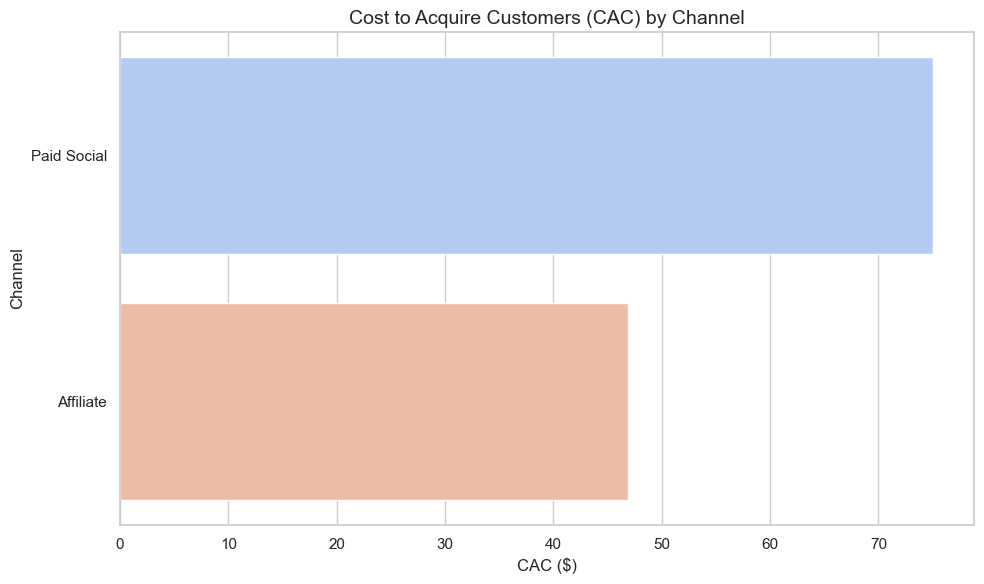

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Sort for clarity
channel_plot = channel_summary[channel_summary['CAC'] > 0].sort_values(by='CAC', ascending=False).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=channel_plot, x='CAC', y='CHANNEL', palette='coolwarm')
plt.title("Cost to Acquire Customers (CAC) by Channel", fontsize=14)
plt.xlabel("CAC ($)")
plt.ylabel("Channel")
plt.tight_layout()
plt.show()


# HEATMAP and BARCHART

C:\Users\ST\AppData\Local\Temp\ipykernel_10140\3460044833.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_cac, x='CAC', y='CHANNEL', palette='Reds')


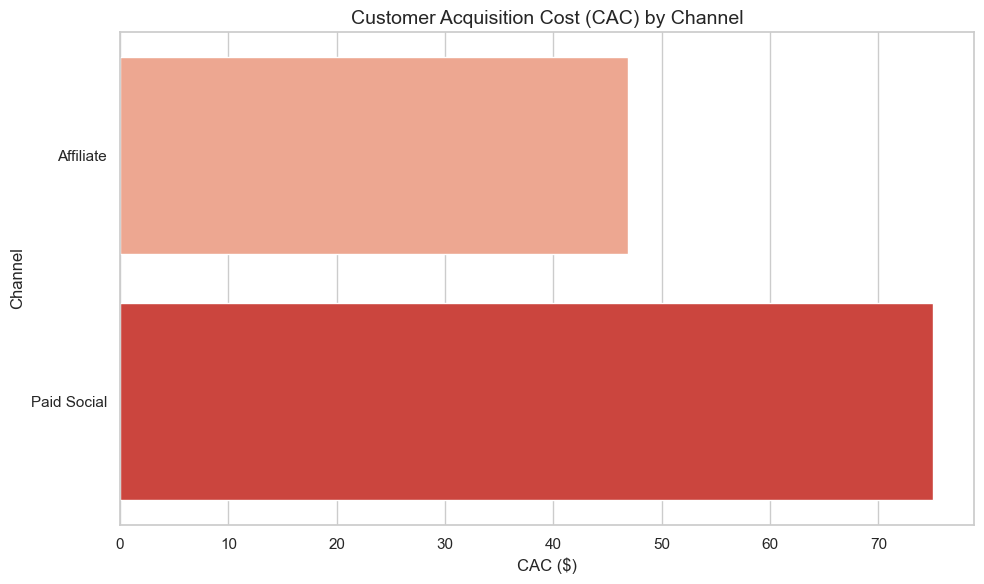

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out zero-CAC channels to focus on meaningful comparisons
channel_cac = channel_summary[channel_summary['CAC'] > 0].sort_values(by='CAC', ascending=True).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=channel_cac, x='CAC', y='CHANNEL', palette='Reds')
plt.title("Customer Acquisition Cost (CAC) by Channel", fontsize=14)
plt.xlabel("CAC ($)")
plt.ylabel("Channel")
plt.tight_layout()
plt.show()


C:\Users\ST\AppData\Local\Temp\ipykernel_10140\2266164904.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_spend, x='Media Spend', y='CHANNEL', palette='Blues')


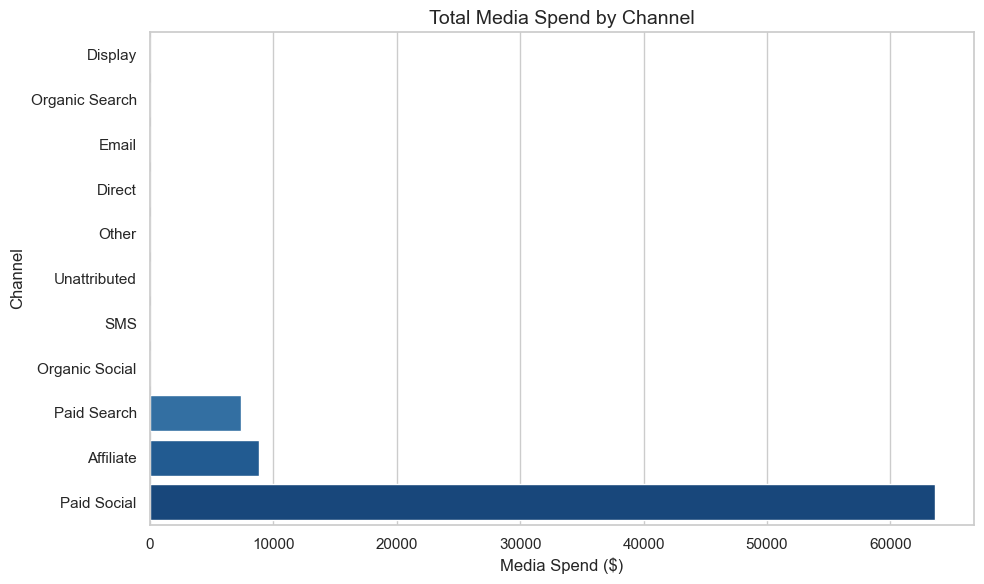

In [54]:
channel_spend = channel_summary.sort_values(by='Media Spend', ascending=True).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=channel_spend, x='Media Spend', y='CHANNEL', palette='Blues')
plt.title("Total Media Spend by Channel", fontsize=14)
plt.xlabel("Media Spend ($)")
plt.ylabel("Channel")
plt.tight_layout()
plt.show()


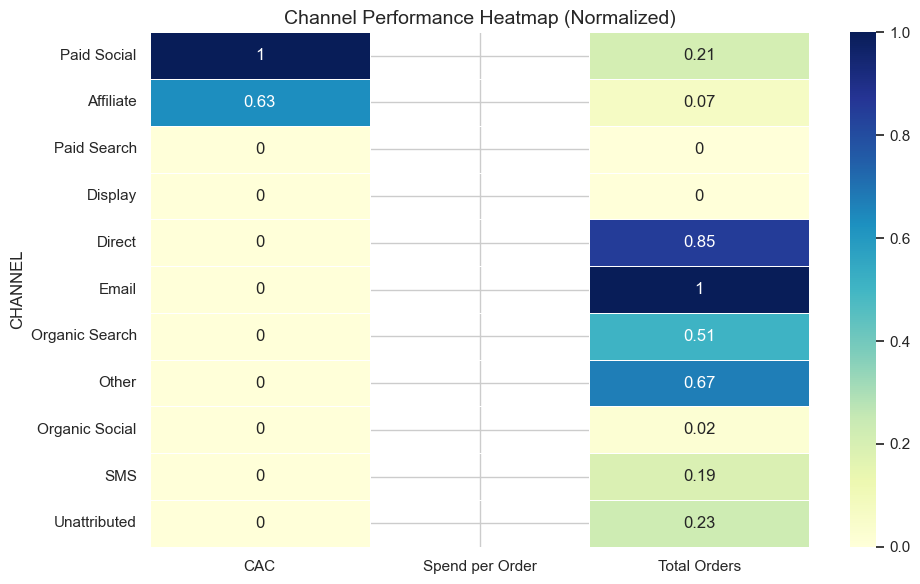

In [55]:
# Normalize and round values to improve contrast
heat_data = channel_summary[['CAC', 'Spend per Order', 'Total Orders']].copy()
heat_data = heat_data.div(heat_data.max()).round(2)

plt.figure(figsize=(10, 6))
sns.heatmap(heat_data, annot=True, cmap='YlGnBu', cbar=True, linewidths=0.5)
plt.title("Channel Performance Heatmap (Normalized)", fontsize=14)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [56]:
# Group by YEAR, MONTH, CHANNEL and sum up
monthly_stats = (
    hp_df.groupby(['YEAR', 'MONTH', 'CHANNEL'])[['Media Spend', 'New Customers', 'Total Orders']]
    .sum()
    .reset_index()
)

# Calculate CAC (avoid division by zero)
monthly_stats['CAC'] = monthly_stats['Media Spend'] / monthly_stats['New Customers'].replace(0, np.nan)
monthly_stats['CAC'] = monthly_stats['CAC'].fillna(0).round(2)

# Spend per Order
monthly_stats['Spend per Order'] = monthly_stats['Media Spend'] / monthly_stats['Total Orders'].replace(0, np.nan)
monthly_stats['Spend per Order'] = monthly_stats['Spend per Order'].fillna(0).round(2)

# Preview
print(monthly_stats.tail(20))


     YEAR    MONTH         CHANNEL  Media Spend  New Customers  Total Orders     CAC  Spend per Order
97   2025  JANUARY  Organic Search         0.00          766.0           0.0    0.00              0.0
98   2025  JANUARY  Organic Social         0.00           18.0           0.0    0.00              0.0
99   2025  JANUARY           Other         0.00          587.0           0.0    0.00              0.0
100  2025  JANUARY     Paid Search      6063.14            0.0           0.0    0.00              0.0
101  2025  JANUARY     Paid Social    123471.86          534.0           0.0  231.22              0.0
102  2025  JANUARY             SMS         0.00           89.0           0.0    0.00              0.0
103  2025  JANUARY    Unattributed         0.00          240.0           0.0    0.00              0.0
104  2025    MARCH       Affiliate     18853.00          168.0           0.0  112.22              0.0
105  2025    MARCH          Direct         0.00          639.0           0.0    0.

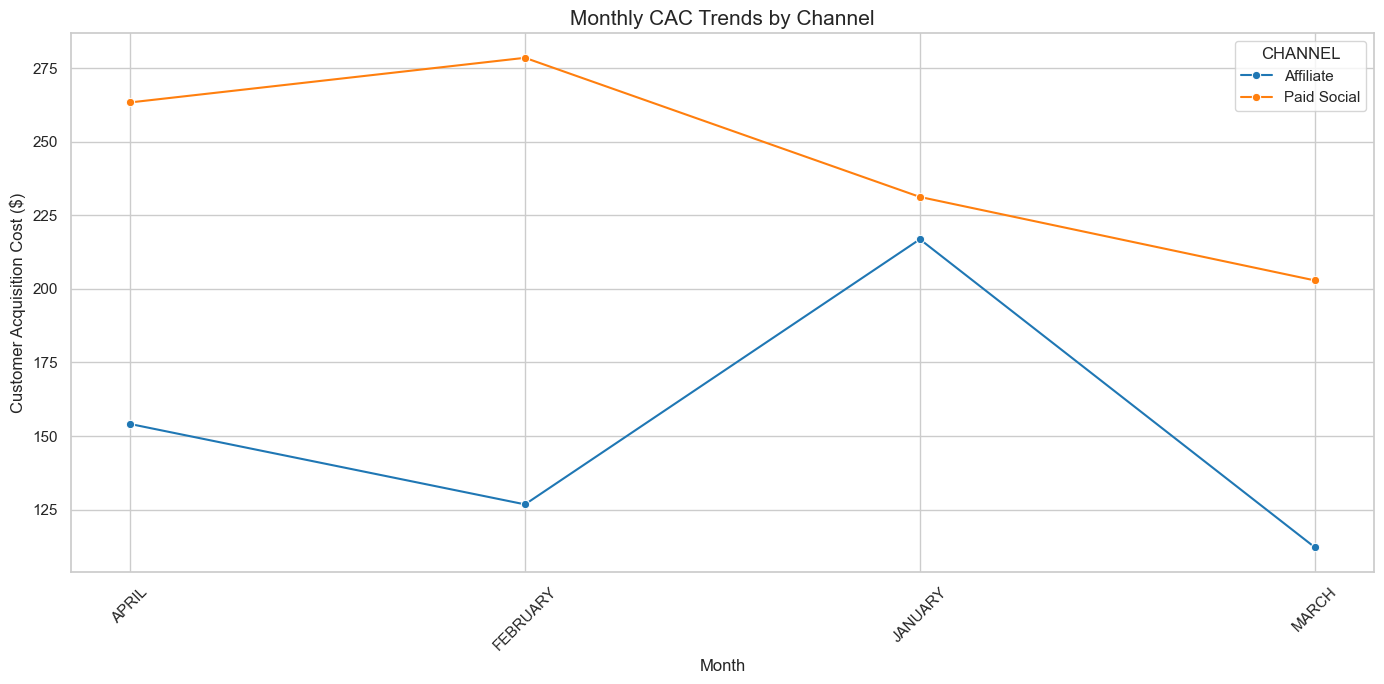

In [57]:
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=monthly_stats[monthly_stats['CAC'] > 0],  # Only channels with spend
    x='MONTH',
    y='CAC',
    hue='CHANNEL',
    marker='o',
    palette='tab10'
)
plt.title("Monthly CAC Trends by Channel", fontsize=15)
plt.xlabel("Month")
plt.ylabel("Customer Acquisition Cost ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


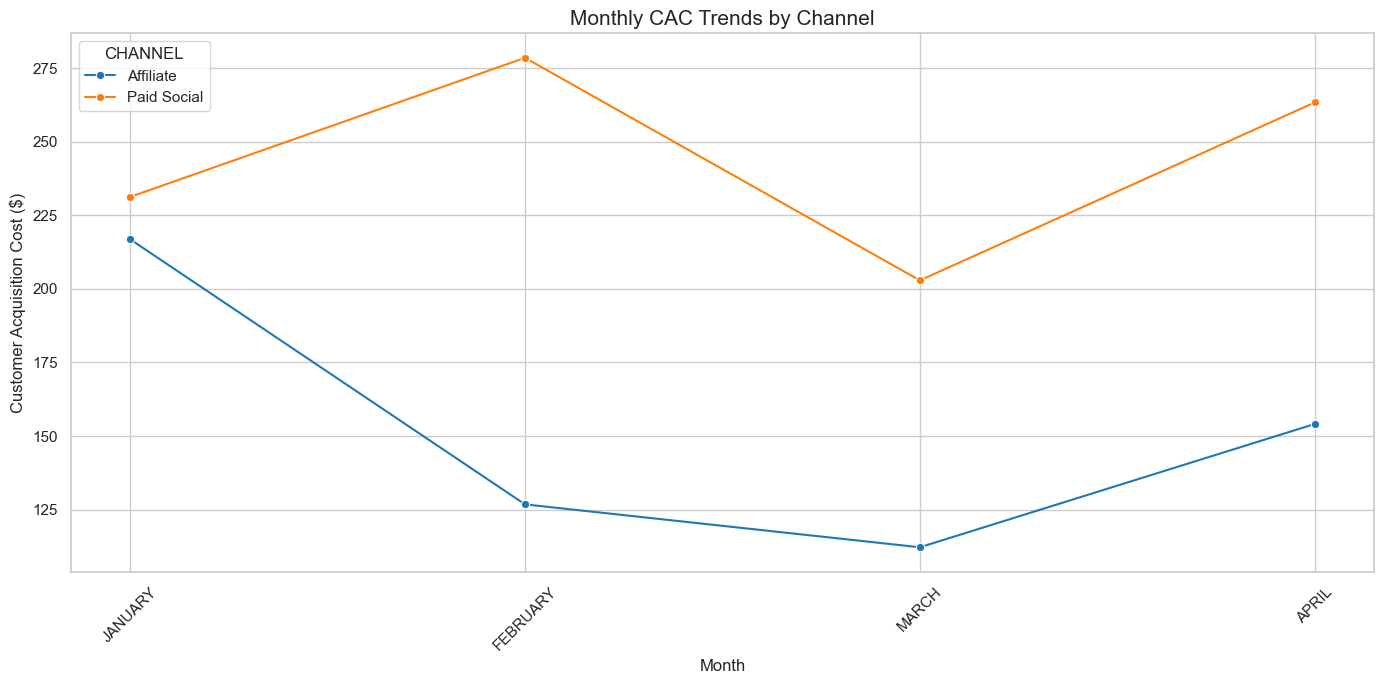

In [58]:
# Define correct month order
month_order = ['JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY', 'JUNE',
               'JULY', 'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER']

# Apply ordered categorical type
monthly_stats['MONTH'] = pd.Categorical(monthly_stats['MONTH'], categories=month_order, ordered=True)

# Then sort the DataFrame
monthly_stats = monthly_stats.sort_values(by=['YEAR', 'MONTH'])
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=monthly_stats[monthly_stats['CAC'] > 0],  # Only channels with spend
    x='MONTH',
    y='CAC',
    hue='CHANNEL',
    marker='o',
    palette='tab10'
)
plt.title("Monthly CAC Trends by Channel", fontsize=15)
plt.xlabel("Month")
plt.ylabel("Customer Acquisition Cost ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\ST\AppData\Local\Temp\ipykernel_10140\1949712887.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


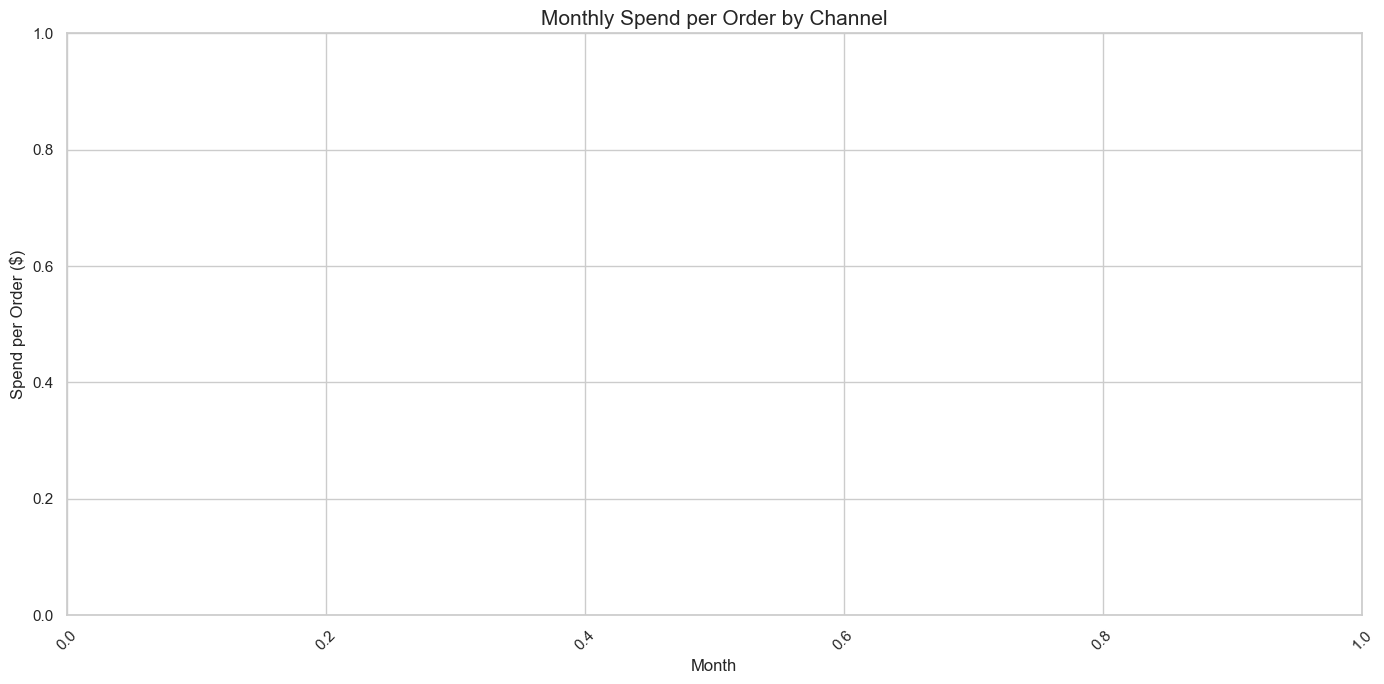

In [59]:
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=monthly_stats[monthly_stats['Spend per Order'] > 0],
    x='MONTH',
    y='Spend per Order',
    hue='CHANNEL',
    marker='o',
    palette='Set2'
)
plt.title("Monthly Spend per Order by Channel", fontsize=15)
plt.xlabel("Month")
plt.ylabel("Spend per Order ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [60]:
monthly_stats['Spend per Order'].describe()


count    117.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Spend per Order, dtype: float64

In [61]:
# Check where spend exists but orders are zero
problem_rows = monthly_stats[
    (monthly_stats['Media Spend'] > 0) & (monthly_stats['Total Orders'] == 0)
]
print(problem_rows[['YEAR', 'MONTH', 'CHANNEL', 'Media Spend', 'Total Orders']])


     YEAR     MONTH      CHANNEL  Media Spend  Total Orders
94   2025   JANUARY    Affiliate     32311.00           0.0
100  2025   JANUARY  Paid Search      6063.14           0.0
101  2025   JANUARY  Paid Social    123471.86           0.0
84   2025  FEBRUARY    Affiliate     16483.00           0.0
90   2025  FEBRUARY  Paid Search      6873.95           0.0
91   2025  FEBRUARY  Paid Social    105822.05           0.0
104  2025     MARCH    Affiliate     18853.00           0.0
110  2025     MARCH  Paid Search      8191.74           0.0
111  2025     MARCH  Paid Social    169598.26           0.0
74   2025     APRIL    Affiliate     19725.00           0.0
80   2025     APRIL  Paid Search      8339.31           0.0
81   2025     APRIL  Paid Social    166945.69           0.0
114  2025       MAY    Affiliate     27439.00           0.0
115  2025       MAY  Paid Search      7500.72           0.0
116  2025       MAY  Paid Social    260773.28           0.0


In [62]:
import pandas as pd

# Load your dataset
df = pd.read_csv("../data/processed/processed.csv")

# Define channel name corrections
channel_mapping = {
    "Paid Search": "Paid Search Media",
    "Paid Social": "Paid Social Media",
    "Affiliates": "Affiliate Media",
    "Affiliate": "Affiliate Media",  # just in case some are singular
    # Add any other mappings as needed
}

# Apply the mapping to fix CHANNEL names
df["CHANNEL"] = df["CHANNEL"].replace(channel_mapping)

# Optional: fill missing media spend with 0 (if desired)
df["Media_Spend"] = df["Media_Spend"].fillna(0)

# Save the cleaned file
df.to_csv("cleaned_dataset.csv", index=False)

print("CHANNEL names normalized and dataset saved as 'cleaned_dataset.csv'")


CHANNEL names normalized and dataset saved as 'cleaned_dataset.csv'


In [64]:
df.head(40)

,CHANNEL,YEAR,MONTH,Customer_Type,Orders,Customers,Media_Spend
0,Affiliate Media,2023,APRIL,Existing,144.0,137.0,0.00
1,Affiliate Media,2023,AUGUST,Existing,138.0,131.0,0.00
2,Affiliate Media,2023,DECEMBER,Existing,138.0,131.0,0.00
3,Affiliate Media,2023,FEBRUARY,Existing,128.0,122.0,0.00
4,Affiliate Media,2023,JANUARY,Existing,120.0,114.0,0.00
5,Affiliate Media,2023,JULY,Existing,138.0,131.0,0.00
6,Affiliate Media,2023,JUNE,Existing,138.0,131.0,0.00
7,Affiliate Media,2023,MARCH,Existing,138.0,132.0,0.00
8,Affiliate Media,2023,MAY,Existing,138.0,131.0,0.00
9,Affiliate Media,2023,NOVEMBER,Existing,138.0,131.0,0.00


In [65]:
df["Orders"] = df["Orders"].fillna(0).astype(int)
df["Customers"] = df["Customers"].fillna(0).astype(int)


In [66]:
df["MONTH"] = df["MONTH"].str.upper()


In [67]:
dx = df

In [68]:
# Fix data types
df["Orders"] = df["Orders"].fillna(0).astype(int)
df["Customers"] = df["Customers"].fillna(0).astype(int)
df["Media_Spend"] = df["Media_Spend"].fillna(0.0).astype(float)
df["MONTH"] = df["MONTH"].str.capitalize()  # Jan, Feb, etc.


In [69]:
import pandas as pd

df["Date"] = pd.to_datetime(df["MONTH"] + " " + df["YEAR"].astype(str), format="%B %Y")
df = df.sort_values("Date")


# 📊 2. Exploratory Data Analysis (EDA)


<Axes: title={'center': 'Total Media Spend by Channel'}, xlabel='CHANNEL'>

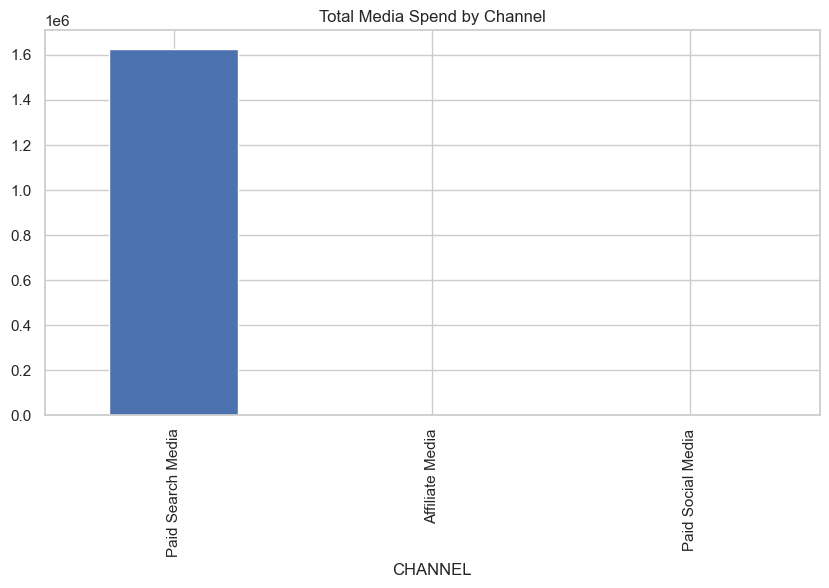

In [70]:
df.groupby("CHANNEL")["Media_Spend"].sum().sort_values(ascending=False).plot(kind="bar", title="Total Media Spend by Channel", figsize=(10, 5))


<Axes: title={'center': 'New vs Existing Orders Over Time'}, xlabel='Date'>

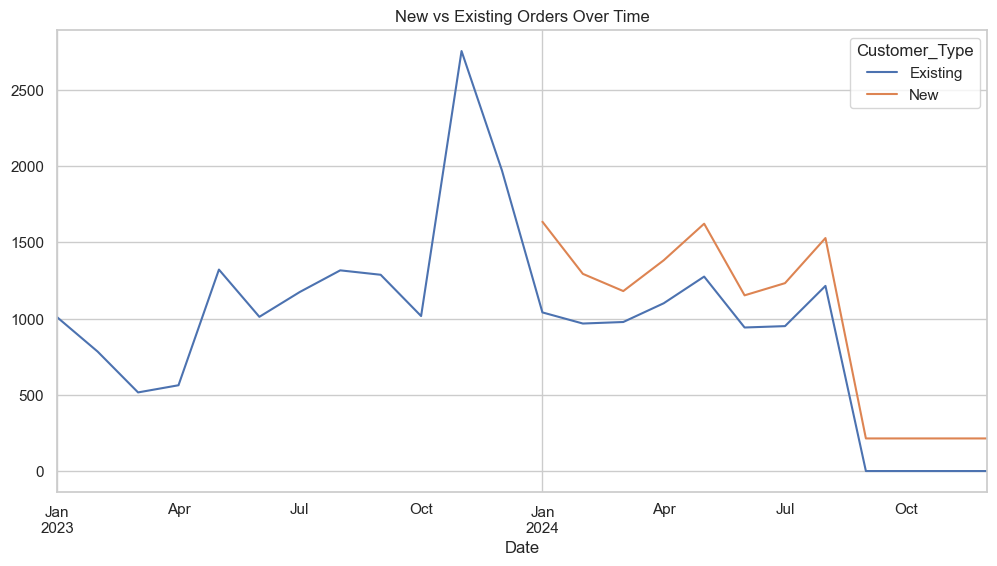

In [71]:
pivot = df.pivot_table(index="Date", columns="Customer_Type", values="Orders", aggfunc="sum")
pivot.plot(title="New vs Existing Orders Over Time", figsize=(12, 6))


In [77]:
df["CAC"] = df["Media_Spend"] / df["Customers"]


In [78]:
df.loc[df["CAC"].isin([float("inf"), float("nan")]), "CAC"] = 0


In [79]:
df["CAC"] = df["Media_Spend"] / df["Customers"]
df["CAC"] = df["CAC"].replace([float("inf"), float("nan")], 0)


In [80]:
# If available:
df["Revenue"] = df["Orders"] * AOV  # AOV = Average Order Value (example: 100)

df["ROAS"] = df["Revenue"] / df["Media_Spend"]
df["Profit"] = df["Revenue"] - df["Media_Spend"]


NameError: name 'AOV' is not defined

In [81]:
df

,CHANNEL,YEAR,MONTH,Customer_Type,Orders,Customers,Media_Spend,Date,CAC
4,Affiliate Media,2023,January,Existing,120,114,0.0,2023-01-01,0.0
28,Paid Search Media,2023,January,Existing,765,734,0.0,2023-01-01,0.0
69,Paid Social Media,2023,January,Existing,124,118,0.0,2023-01-01,0.0
3,Affiliate Media,2023,February,Existing,128,122,0.0,2023-02-01,0.0
27,Paid Search Media,2023,February,Existing,550,524,0.0,2023-02-01,0.0
...,...,...,...,...,...,...,...,...,...
62,Paid Search Media,2025,January,NaN,0,0,52392.0,2025-01-01,0.0
61,Paid Search Media,2025,February,NaN,0,0,53764.0,2025-02-01,0.0
63,Paid Search Media,2025,March,NaN,0,0,76624.0,2025-03-01,0.0
60,Paid Search Media,2025,April,NaN,0,0,80616.0,2025-04-01,0.0
